In [30]:
# Dependencies and Setup
#%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats

In [31]:
# Import data to convert text fields to categorical fields
data = pd.read_csv("train.csv")
d = data[["LotArea", "OverallQual", "YearRemodAdd", "TotalBsmtSF", "GrLivArea", "SalePrice" ]].copy()
d["ln_SalePrice"] = np.log(d["SalePrice"])
formodel = (d - d.mean()) / (d.max() - d.min())
#formodel.describe()

In [32]:
# Create formula (form1) for use in linear models
a = formodel.columns[0]
b = formodel.columns[1]
c = formodel.columns[2]
d = formodel.columns[3]
e = formodel.columns[4]

form1 = "SalePrice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e
form2 = "ln_SalePrice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e
#form2

In [33]:
# GLM consistent with Ordinary least squares --- sm.families.links.log
model_ols = smf.glm(formula = form1, data = formodel, family = sm.families.Gaussian(sm.families.links.log)).fit()
#print(model_ols.summary())
ols_test = smf.ols(formula = form2, data = formodel).fit()
#print(ols_test.summary())

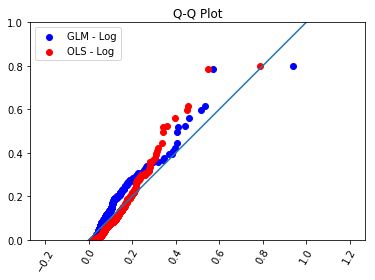

In [34]:
formodel["Pred1"] = model_ols.predict()
formodel["Pred2"] = ols_test.predict()
min = 0
max = 1
plt.scatter(np.sort(formodel["Pred1"]),np.sort(formodel["SalePrice"]),color="blue",label="GLM - Log")
plt.scatter(np.sort(formodel["Pred2"]),np.sort(formodel["SalePrice"]),color="red",label="OLS - Log")
plt.legend()
plt.plot([0,max],[0,max])

plt.axis("equal")
plt.title("Q-Q Plot")
plt.xticks(rotation = 60)
plt.xlim(min,max)
plt.ylim(min,max)

plt.show()

In [35]:
A = np.identity(len(model_ols.params))
A = A[1:,:]
print(model_ols.f_test(A))

<F test: F=array([[161.34450573]]), p=1.4017662807725274e-136, df_denom=1454, df_num=5>


In [36]:
from sklearn import preprocessing

X = data[["LotArea", "OverallQual", "YearRemodAdd", "TotalBsmtSF", "GrLivArea"]].copy()

X_train = preprocessing.scale(X)
X_train = pd.DataFrame(X_train,columns=X.columns)
y_train = data[["SalePrice"]].copy()
#y_train = preprocessing.scale(y) y_train.mean() y_train.min() X_train.describe()

C:\Users\mryet\Anaconda3\envs\NeuralNetwork\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """


In [79]:
#Imports
from keras.models import Sequential
from keras.layers import Dense
# Add the first hidden layer
model = Sequential()
model.add(Dense(5, activation= 'relu', input_dim=5))
model.add(Dense(20, activation= 'relu'))
model.add(Dense(10, activation= 'relu'))
model.add(Dense(10, activation= 'relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_31 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_33 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 11        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.fit(X_train, y_train, epochs=200, verbose=False)

In [81]:
output_X = model.predict(X_train)
output_X.mean()

180761.42

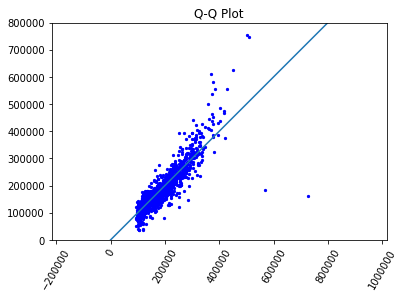

In [82]:
min = 0
max = 800000
plt.scatter(np.sort(output_X), np.sort(y_train), s = 5, color="blue", label="Neural Network")
plt.plot([0,max],[0,max])

plt.axis("equal")
plt.title("Q-Q Plot")
plt.xticks(rotation = 60)
plt.xlim(min,max)
plt.ylim(min,max)
plt.show()

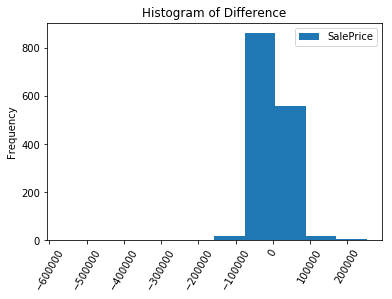

Min: $-565,413  Max: $252,357


In [83]:
diff = y_train - output_X
diff.plot.hist()
plt.xticks(rotation=60)
plt.title("Histogram of Difference")
plt.show()
print("Min: " + "${:,.0f}".format(diff.min()[0]) + "  Max: " + "${:,.0f}".format(diff.max()[0]))